# Task 4 Decision Tree Visualisation

### We have to use the iris dataset to train a decision tree and visualize it 

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
%matplotlib notebook

## Importing and Exploring the data

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3)

In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Creating and Training the model

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

## Visualising the Tree

<IPython.core.display.Javascript object>


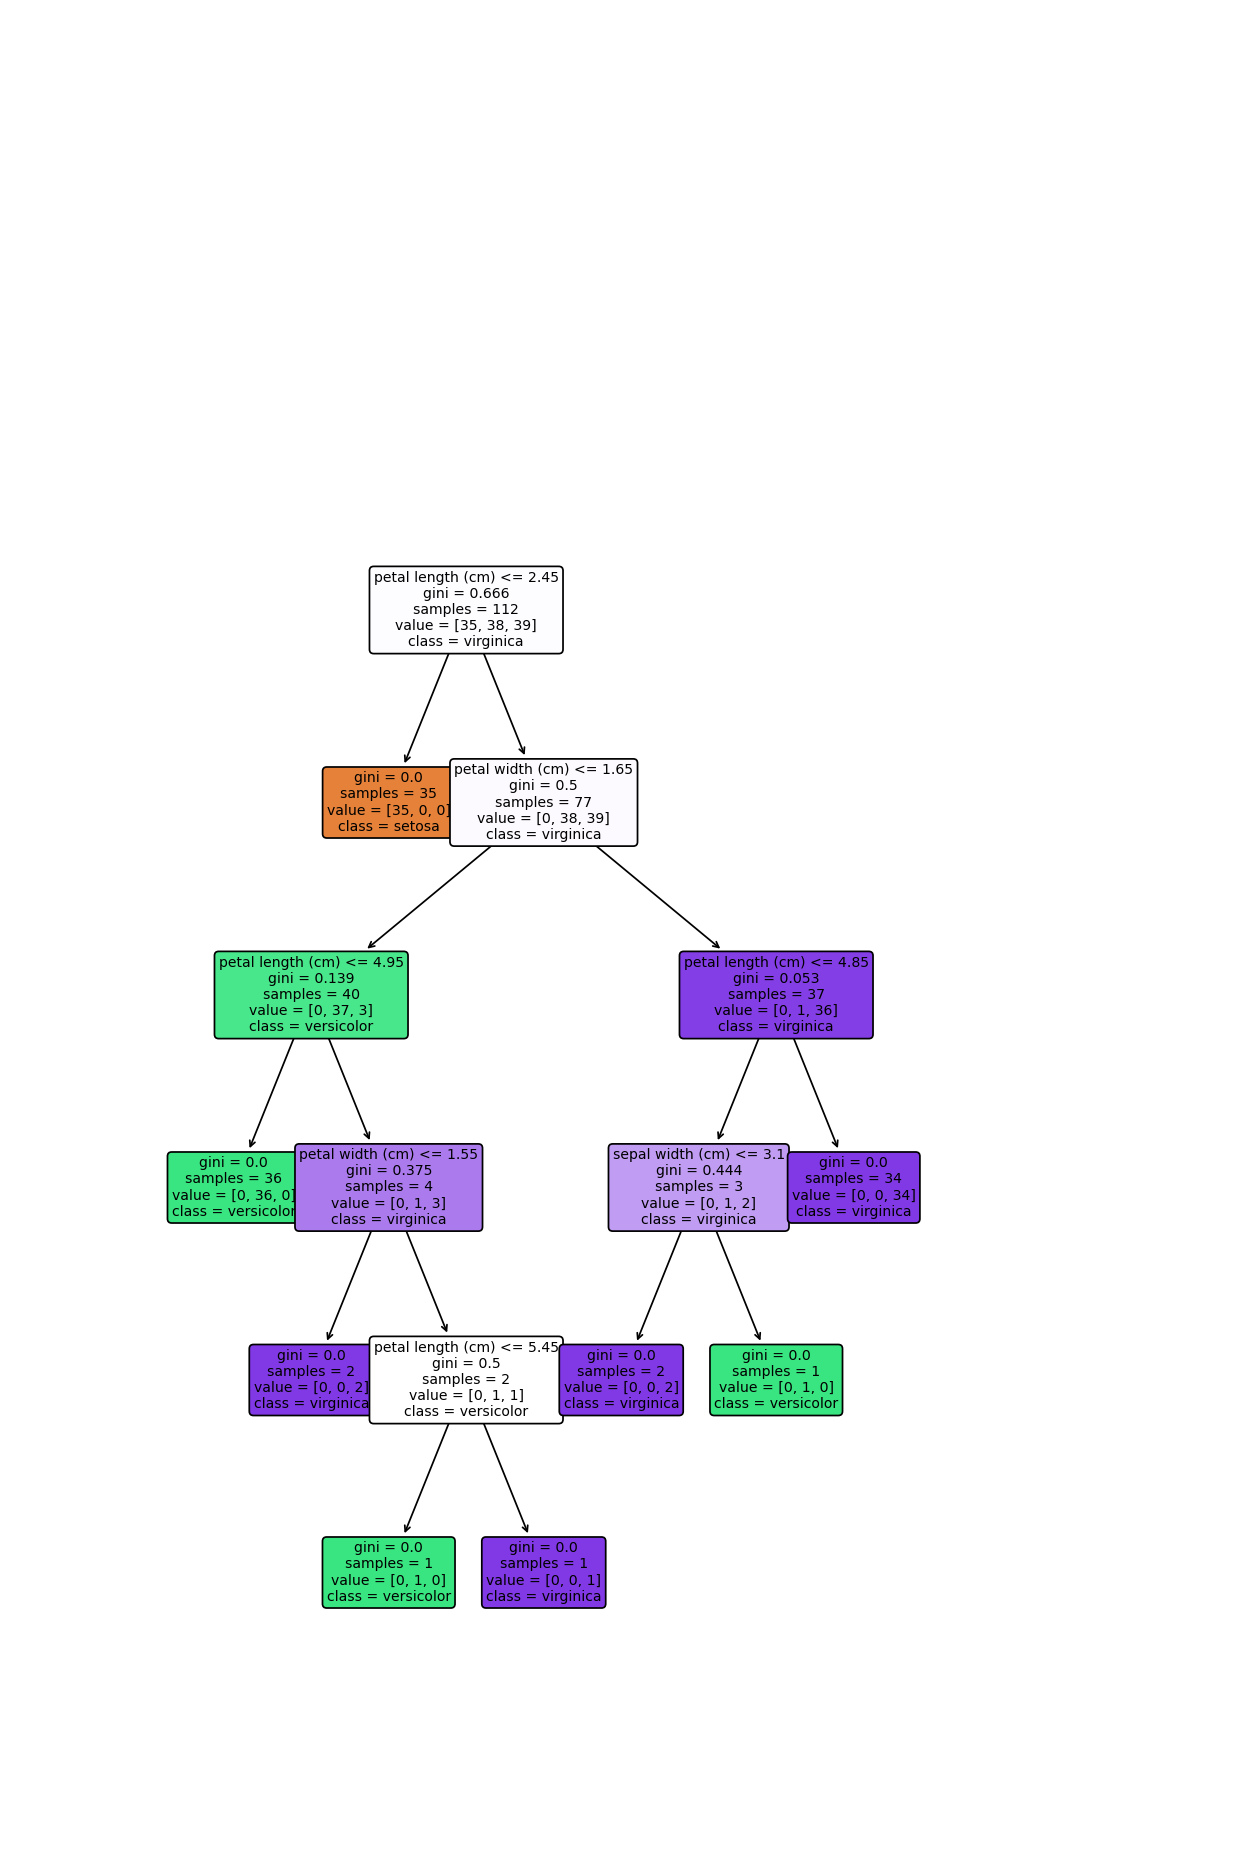

In [90]:
plt.figure(figsize = (10,15))
plot = plot_tree(clf, feature_names = iris.feature_names, class_names = iris.target_names, filled = True, rounded = True)

In [89]:
from sklearn.tree import export_text
text = export_text(clf, feature_names = iris.feature_names)
print(text)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



# Testing the classifier

In [97]:
from sklearn.metrics import confusion_matrix
predict = clf.predict(X_test)
confusion = confusion_matrix(y_test,predict)
print('Confusion Matrix is: - ')
print(confusion)

Confusion Matrix is: - 
[[15  0  0]
 [ 0 11  1]
 [ 0  0 11]]


In [98]:
print('Accuracy of the classifier is {}'.format(clf.score(X_test,y_test)))

Accuracy of the classifier is 0.9736842105263158
